In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

## Below is the code for Data Cleaning and Preprocessing

In [2]:
# 0 = black_russian_terrier
# 1 = bulldog
# 2 = dalmatian
# 3 = german_shepherd
# 4 = maltese

new_dimensions = (150, 150)
dataset_size = 140
XTrain = []
ytrain = []
count = 0
dog_list = ['dog_black_russian_terrier_images', 'dog_bulldog_images', 'dog_dalmatian_images', 'dog_german_shepherd_images', 'dog_maltese_images']

for idx, dog in enumerate(dog_list):
    count = 0
    for j in range(dataset_size):
        try:
            path = r"C:\Users\birud\OneDrive - iitgn.ac.in\github\Image Classifier\Dataset_WoC_6.0_Checkpoint_2\%s\%s.jpg" % (dog, j)
            image = cv2.imread(path)

            # Convert all images to RGB model
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            resized_image = cv2.resize(rgb_image, new_dimensions)

            # Normalize pixel values to the range (0, 1)
            normalized_image = resized_image / 255.0
            pixels = np.array(normalized_image)
            flattened_pixels = pixels.reshape(-1)

        except:
            print(f"Failed to process image{j} in {dog}, going to next one")
            continue

        if flattened_pixels[0] is not None:  # Checking if the first pixel is not None
            XTrain.append(flattened_pixels)
            count += 1

    print(f'Filtered {count} / {dataset_size} images in {dog}')
    print("--------------------------------------------------------------------------------------------------")
    choose_label = idx
    for k in range(count): 
        ytrain.append(choose_label)

print('done')


Failed to process image8 in dog_black_russian_terrier_images, going to next one
Failed to process image38 in dog_black_russian_terrier_images, going to next one
Failed to process image49 in dog_black_russian_terrier_images, going to next one
Failed to process image52 in dog_black_russian_terrier_images, going to next one
Failed to process image67 in dog_black_russian_terrier_images, going to next one
Failed to process image69 in dog_black_russian_terrier_images, going to next one
Failed to process image79 in dog_black_russian_terrier_images, going to next one
Failed to process image87 in dog_black_russian_terrier_images, going to next one
Failed to process image96 in dog_black_russian_terrier_images, going to next one
Failed to process image99 in dog_black_russian_terrier_images, going to next one
Failed to process image103 in dog_black_russian_terrier_images, going to next one
Failed to process image129 in dog_black_russian_terrier_images, going to next one
Failed to process image130 

In [3]:
print(len(ytrain))
print(len(XTrain))

622
622


In [4]:
column_names = [f"pixel_{i}" for i in range(67500)]
Xtrain_df = pd.DataFrame(XTrain, columns=column_names)
ytrain = np.array(ytrain)
Ytrain_df = pd.DataFrame({'Labels': ytrain})
# Display the DataFrame
print(Xtrain_df)
print("---------------------------------------------------")
print(Ytrain_df)

      pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0    0.337255  0.403922  0.235294  0.427451  0.498039  0.321569  0.439216   
1    0.427451  0.333333  0.152941  0.431373  0.341176  0.141176  0.462745   
2    0.584314  0.556863  0.325490  0.525490  0.556863  0.372549  0.607843   
3    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4    0.792157  0.796078  0.823529  0.788235  0.796078  0.819608  0.784314   
..        ...       ...       ...       ...       ...       ...       ...   
617  0.792157  0.862745  0.909804  0.796078  0.866667  0.913725  0.800000   
618  0.678431  0.690196  0.611765  0.639216  0.650980  0.588235  0.596078   
619  0.141176  0.105882  0.039216  0.149020  0.113725  0.047059  0.160784   
620  0.105882  0.325490  0.184314  0.086275  0.301961  0.188235  0.058824   
621  0.156863  0.137255  0.019608  0.149020  0.129412  0.019608  0.156863   

      pixel_7   pixel_8   pixel_9  ...  pixel_67490  pixel_67491  pixel_674

In [5]:
new_dimensions = (150, 150)
# folder_name = 'Test_preprocessed'

def preprocessing(i):
        path = r'C:\Users\birud\OneDrive - iitgn.ac.in\github\Image Classifier\Project_WoC_6.0_Checkpoint_3\Test_Images\%s.jpg' %(i)
        image = cv2.imread(path)
        # Convert to RGB model
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image
        resized_image = cv2.resize(rgb_image, new_dimensions)

        # Normalize pixel values to the range (0, 1)
        normalized_image = resized_image / 255.0
        pixels = np.array(normalized_image)
        flattened_pixels = pixels.reshape(-1)
        
        return flattened_pixels

## Below Code is to Train the Model

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(Xtrain_df,Ytrain_df, test_size = 0.2, random_state = 42 )

In [7]:
model = Sequential(
    [               
        tf.keras.Input(shape=(67500,)), 
        Dense(units = 500, activation = "relu"),
        Dense(units = 250, activation = "relu"),
        Dense(units = 150, activation = "relu"),
        Dense(units = 5, activation = "linear"),
    ], name = "image_classifier" 
)

In [8]:
model.summary()

Model: "image_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               33750500  
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 755       
Total params: 33,914,155
Trainable params: 33,914,155
Non-trainable params: 0
_________________________________________________________________


In [9]:
[layer1, layer2, layer3, layer4] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (67500, 500), b1 shape = (500,)
W2 shape = (500, 250), b2 shape = (250,)
W3 shape = (250, 150), b3 shape = (150,)
W4 shape = (150, 5), b4 shape = (5,)


In [10]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_data,train_labels,
    epochs=60, batch_size = 32, validation_split = 0.2,
    callbacks=[early_stopping]
)

Epoch 1/60
13/13 [==============================] - 2s 112ms/step - loss: 2.4279 - accuracy: 0.2164 - val_loss: 1.7414 - val_accuracy: 0.2800
Epoch 2/60
13/13 [==============================] - 1s 76ms/step - loss: 1.4863 - accuracy: 0.3555 - val_loss: 1.5318 - val_accuracy: 0.4000
Epoch 3/60
13/13 [==============================] - 1s 78ms/step - loss: 1.3037 - accuracy: 0.4521 - val_loss: 1.3292 - val_accuracy: 0.4100
Epoch 4/60
13/13 [==============================] - 1s 75ms/step - loss: 1.1263 - accuracy: 0.5588 - val_loss: 1.6678 - val_accuracy: 0.4100
Epoch 5/60
13/13 [==============================] - 1s 74ms/step - loss: 1.2058 - accuracy: 0.5191 - val_loss: 1.6378 - val_accuracy: 0.3600
Epoch 6/60
13/13 [==============================] - 1s 74ms/step - loss: 1.0379 - accuracy: 0.5339 - val_loss: 1.5205 - val_accuracy: 0.4500
Epoch 7/60
13/13 [==============================] - 1s 74ms/step - loss: 1.1770 - accuracy: 0.5120 - val_loss: 1.7147 - val_accuracy: 0.3300
Epoch 8/60
1

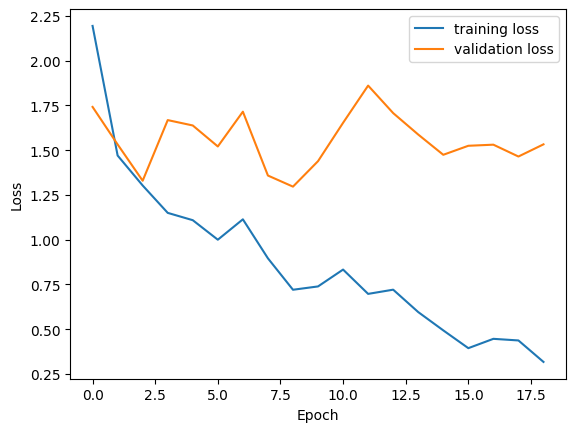

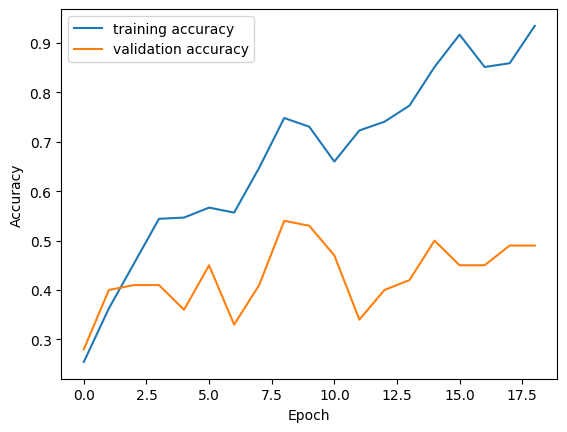

In [11]:
# Plot training history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(test_accuracy)

4/4 [==============================] - 0s 16ms/step - loss: 1.3918 - accuracy: 0.4560
0.4560000002384186


In [13]:
# Load the test image
test_image = preprocessing(2)

prediction = model.predict(test_image.reshape(1,67500))  # prediction

print(f" predicting a Five: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
print("--------------------------------------------------------------------")

prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Five. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")
print("--------------------------------------------------------------------")

yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

# 0 = black_russian_terrier
# 1 = bulldog
# 2 = dalmatian
# 3 = german_shepherd
# 4 = maltese

 predicting a Five: 
[[ 0.14205885 -0.25353676  0.9446739  -0.90153784  0.43094295]]
 Largest Prediction index: 2
--------------------------------------------------------------------
 predicting a Five. Probability vector: 
[[0.17883426 0.12040532 0.3990451  0.06298287 0.23873246]]
Total of predictions: 1.000
--------------------------------------------------------------------
np.argmax(prediction_p): 2
